In [9]:
import pandas as pd
import numpy as np
import re

# Load raw
df = pd.read_csv("mudah-apartment-kl-selangor.csv")

# Quick check of columns
print("Columns in dataset:")
print(df.columns.tolist())
print("\nSample rows:")
display(df.head())

# Robust filter
is_selangor = df["region"].astype(str).str.strip().str.casefold().eq("selangor")
is_fully = df["furnished"].astype(str).str.strip().str.casefold().eq("fully furnished")
df = df[is_selangor & is_fully].copy()

# Helpers
num_block = re.compile(r"(\d[\d\s,]*)")

def parse_first_number(s):
    if pd.isna(s):
        return np.nan
    m = num_block.search(str(s))
    if not m:
        return np.nan
    return float(m.group(1).replace(" ", "").replace(",", ""))

# Clean text→number fields
df["monthly_rent_clean"] = df["monthly_rent"].apply(parse_first_number)
df["size_clean"] = df["size"].apply(parse_first_number)

# Cast simple numerics
for col in ["rooms", "parking", "bathroom", "completion_year"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Save cleaned subset
df.to_csv("selangor_fullyfurnished_apartments_cleaned.csv", index=False)
print("\nSaved selangor_fullyfurnished_apartments_cleaned.csv", df.shape)

# Display filtered and cleaned result
display(df.head())
print(df[["monthly_rent", "monthly_rent_clean"]].head(10))
print(df[["size", "size_clean"]].head(10))

Columns in dataset:
['ads_id', 'prop_name', 'completion_year', 'monthly_rent', 'location', 'property_type', 'rooms', 'parking', 'bathroom', 'size', 'furnished', 'facilities', 'additional_facilities', 'region']

Sample rows:


,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur



Saved selangor_fullyfurnished_apartments_cleaned.csv (3773, 16)


,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,monthly_rent_clean,size_clean
9991,100788837,Mutiara Ville @ Cyberjaya,2013.0,RM 1 600 per month,Selangor - Cyberjaya,Condominium,3.0,2.0,2.0,1000 sq.ft.,Fully Furnished,"Parking, Minimart, Playground, Gymnasium, Secu...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,1600.0,1000.0
9995,100232774,GM Residence Remia,NaN,RM 2 500 per month,Selangor - Klang,Service Residence,3.0,2.0,2.0,815 sq.ft.,Fully Furnished,Multipurpose hall,NaN,Selangor,2500.0,815.0
9996,100854485,Utropolis Urbano,2018.0,RM 1 800 per month,Selangor - Shah Alam,Apartment,2.0,1.0,1.0,800 sq.ft.,Fully Furnished,"Jogging Track, Swimming Pool, Barbeque area, S...",NaN,Selangor,1800.0,800.0
9997,100854477,KU Suites,2015.0,RM 1 600 per month,Selangor - Shah Alam,Service Residence,1.0,NaN,1.0,667 sq.ft.,Fully Furnished,"Sauna, Barbeque area, Multipurpose hall, Secur...","Air-Cond, Washing Machine",Selangor,1600.0,667.0
10000,100854617,Amani Residences,NaN,RM 2 200 per month,Selangor - 389,Service Residence,3.0,NaN,2.0,883 sq.ft.,Fully Furnished,"Parking, Security, Swimming Pool, Playground, ...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Selangor,2200.0,883.0


             monthly_rent  monthly_rent_clean
9991   RM 1 600 per month              1600.0
9995   RM 2 500 per month              2500.0
9996   RM 1 800 per month              1800.0
9997   RM 1 600 per month              1600.0
10000  RM 2 200 per month              2200.0
10001  RM 2 300 per month              2300.0
10002  RM 1 600 per month              1600.0
10008  RM 1 250 per month              1250.0
10009  RM 1 650 per month              1650.0
10011  RM 1 300 per month              1300.0
              size  size_clean
9991   1000 sq.ft.      1000.0
9995    815 sq.ft.       815.0
9996    800 sq.ft.       800.0
9997    667 sq.ft.       667.0
10000   883 sq.ft.       883.0
10001   855 sq.ft.       855.0
10002  1031 sq.ft.      1031.0
10008   450 sq.ft.       450.0
10009   581 sq.ft.       581.0
10011   700 sq.ft.       700.0



Exact duplicate rows: 5
Repeated ads_id: 5

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 3773 non-null   int64  
 1   prop_name              3599 non-null   object 
 2   completion_year        2482 non-null   float64
 3   monthly_rent           3773 non-null   object 
 4   location               3773 non-null   object 
 5   property_type          3773 non-null   object 
 6   rooms                  3772 non-null   float64
 7   parking                2697 non-null   float64
 8   bathroom               3772 non-null   float64
 9   size                   3773 non-null   object 
 10  furnished              3773 non-null   object 
 11  facilities             3367 non-null   object 
 12  additional_facilities  2872 non-null   object 
 13  region                 3773 non

,monthly_rent_clean,completion_year,rooms,parking,bathroom,size_clean
count,3773.000000,2482.000000,3772.000000,2697.000000,3772.000000,3773.000000
mean,1910.395176,2015.303787,2.307264,1.486837,1.717391,840.328386
std,8832.024608,5.260292,0.957999,0.607136,0.581866,345.702350
min,70.000000,1991.000000,1.000000,1.000000,1.000000,1.000000
25%,1200.000000,2014.000000,1.000000,1.000000,1.000000,586.000000
50%,1500.000000,2016.000000,3.000000,1.000000,2.000000,850.000000
75%,1900.000000,2019.000000,3.000000,2.000000,2.000000,1012.000000
max,345000.000000,2024.000000,7.000000,10.000000,8.000000,6400.000000


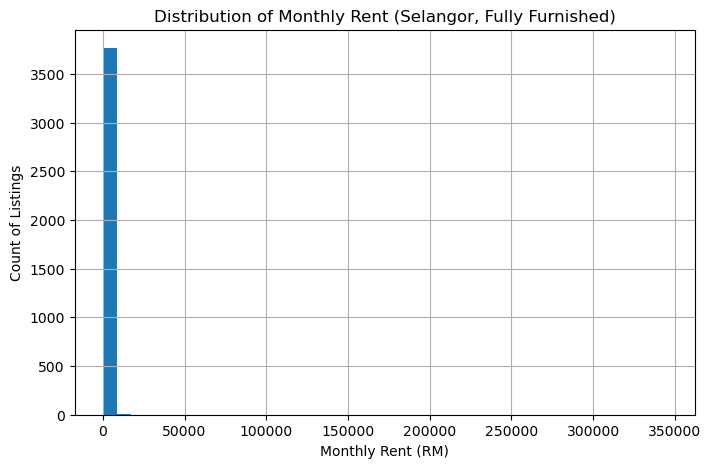

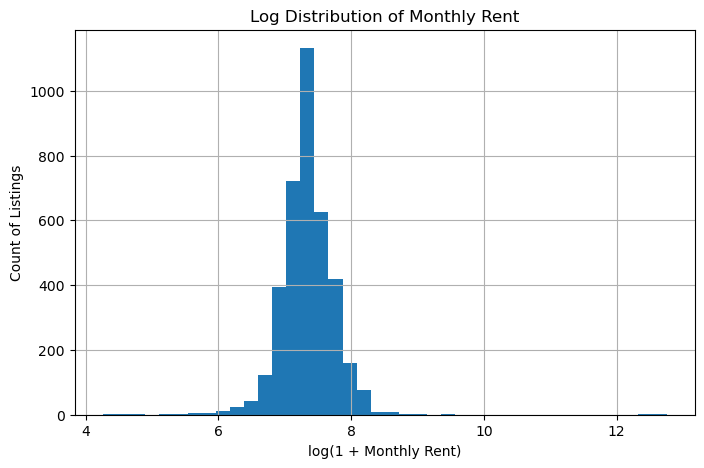


Top values for property_type:
property_type
Condominium          1572
Service Residence    1513
Apartment             517
Studio                106
Duplex                 28
Flat                   18
Others                 13
Townhouse Condo         5
Houses                  1
Name: count, dtype: int64


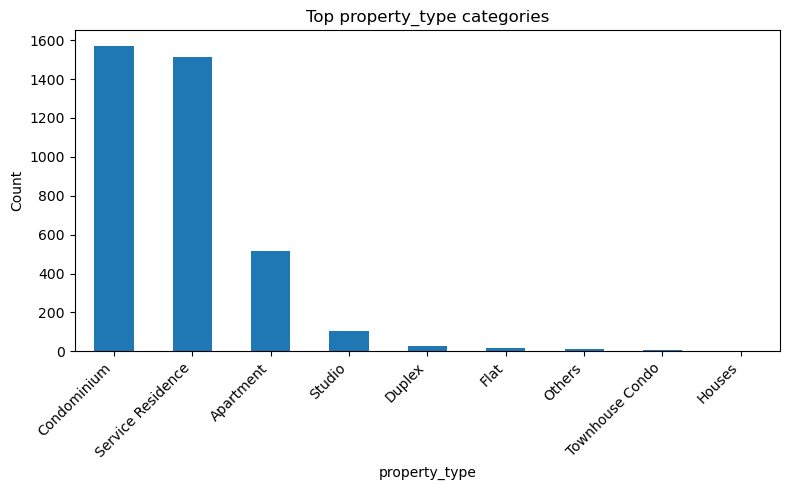


Top values for location:
location
Selangor - Cyberjaya         595
Selangor - Shah Alam         364
Selangor - Petaling Jaya     266
Selangor - Kajang            260
Selangor - Seri Kembangan    245
Selangor - Puchong           207
Selangor - Cheras            143
Selangor - Subang Jaya       136
Selangor - Setia Alam        133
Selangor - Klang             133
Name: count, dtype: int64


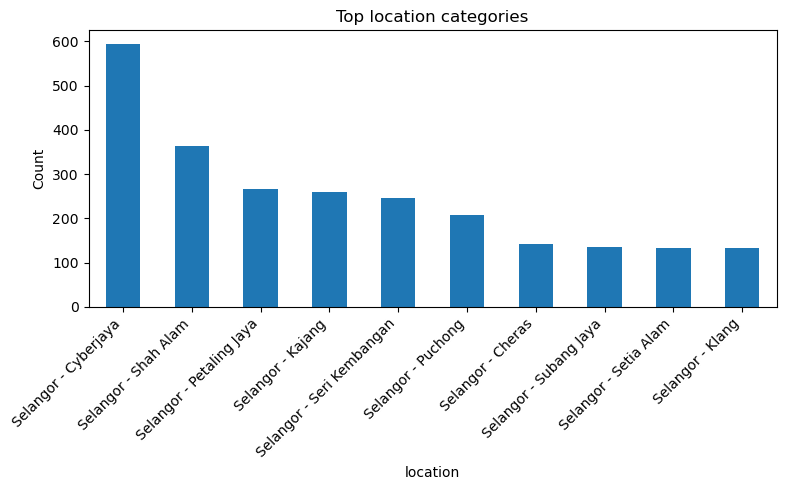

<Figure size 800x500 with 0 Axes>

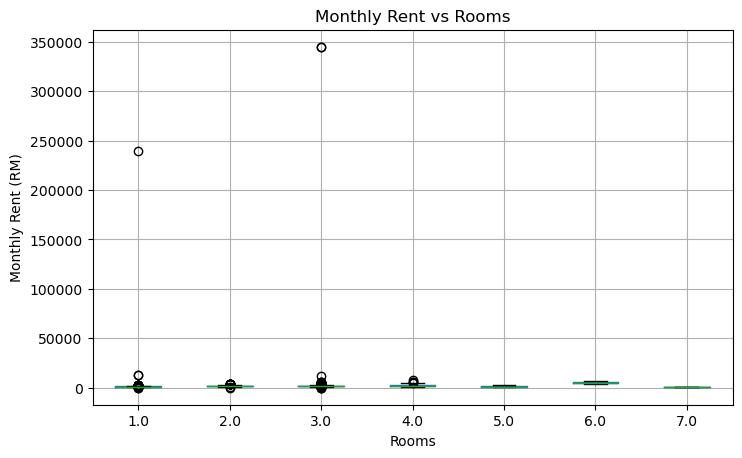

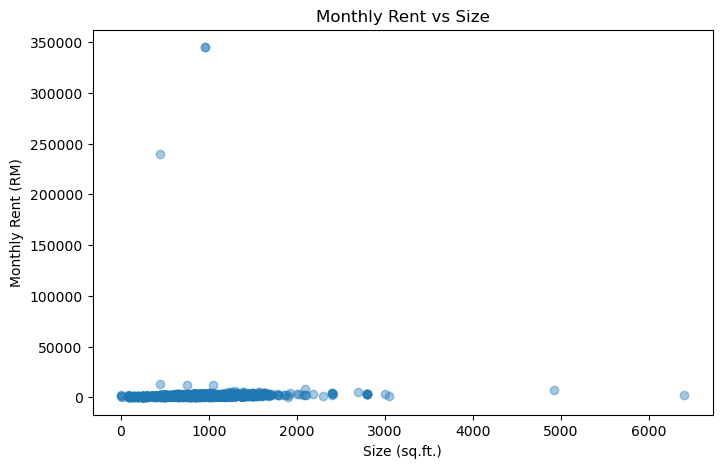


Rent band distribution:
rent_band
Mid (1500-2499)    1766
Low (<1500)        1576
High (2500+)        431
Name: count, dtype: int64


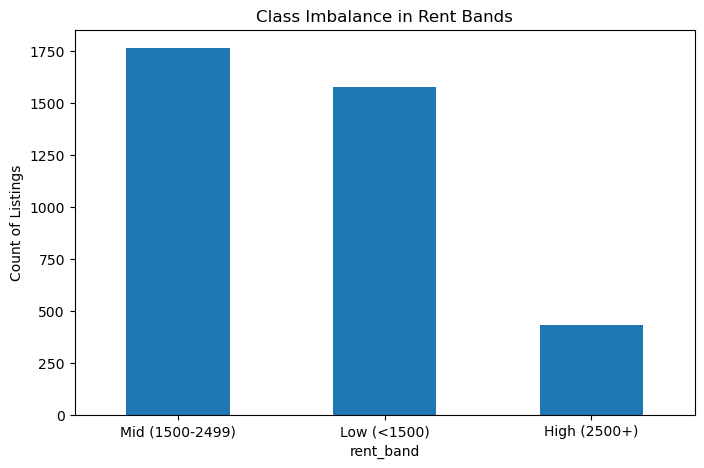

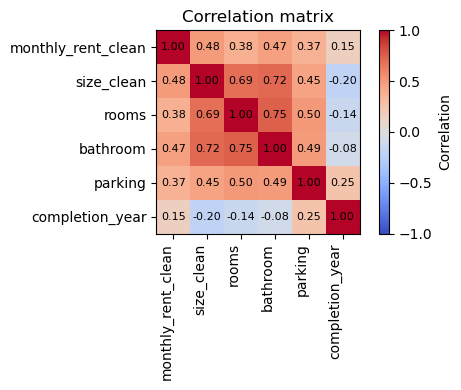

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)

# === Load cleaned subset ===
df = pd.read_csv("selangor_fullyfurnished_apartments_cleaned.csv")

# === Duplicate checks (report only) ===
dup_exact = df.duplicated().sum()
dup_ids = df["ads_id"].duplicated(keep="first").sum() if "ads_id" in df.columns else 0
print(f"\nExact duplicate rows: {dup_exact}")
print(f"Repeated ads_id: {dup_ids}")

# === Structure + missingness overview ===
print("\nData types and non-null counts:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum())

# === Sanity checks for filtered constants ===
if "region" in df.columns:
    print("\nregion unique values:", df["region"].unique())
if "furnished" in df.columns:
    print("furnished unique values:", df["furnished"].unique())

# === Numeric summary for modelling-relevant columns ===
numeric_cols = [
    "monthly_rent_clean",   # target
    "completion_year",
    "rooms",
    "parking",
    "bathroom",
    "size_clean"
]
existing_numeric = [c for c in numeric_cols if c in df.columns]
print("\nDescriptive statistics (numeric columns):")
display(df[existing_numeric].describe())

# === Target distribution (raw) ===
plt.figure()
df["monthly_rent_clean"].dropna().hist(bins=40)
plt.xlabel("Monthly Rent (RM)")
plt.ylabel("Count of Listings")
plt.title("Distribution of Monthly Rent (Selangor, Fully Furnished)")
plt.show()

# === Target distribution (log1p) to assess skew ===
plt.figure()
rent_no_na = df["monthly_rent_clean"].dropna()
np.log1p(rent_no_na).hist(bins=40)
plt.xlabel("log(1 + Monthly Rent)")
plt.ylabel("Count of Listings")
plt.title("Log Distribution of Monthly Rent")
plt.show()

# === Categorical frequency (top K) ===
cat_cols = ["property_type", "location"]
for col in cat_cols:
    if col in df.columns:
        print(f"\nTop values for {col}:")
        vc = df[col].value_counts()
        print(vc.head(10))

        plt.figure()
        vc.head(10).plot(kind='bar')
        plt.ylabel("Count")
        plt.title(f"Top {col} categories")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# === Relationship checks ===
if {"rooms", "monthly_rent_clean"}.issubset(df.columns):
    box_tmp = df[["rooms", "monthly_rent_clean"]].dropna()
    if not box_tmp.empty:
        plt.figure()
        box_tmp.boxplot(column="monthly_rent_clean", by="rooms")
        plt.xlabel("Rooms")
        plt.ylabel("Monthly Rent (RM)")
        plt.title("Monthly Rent vs Rooms")
        plt.suptitle("")
        plt.show()

if {"size_clean", "monthly_rent_clean"}.issubset(df.columns):
    scatter_tmp = df[["size_clean", "monthly_rent_clean"]].dropna()
    if not scatter_tmp.empty:
        plt.figure()
        plt.scatter(scatter_tmp["size_clean"], scatter_tmp["monthly_rent_clean"], alpha=0.4)
        plt.xlabel("Size (sq.ft.)")
        plt.ylabel("Monthly Rent (RM)")
        plt.title("Monthly Rent vs Size")
        plt.show()

# === Class-like bands to inspect imbalance in target segments ===
def rent_band(rm):
    if pd.isna(rm):
        return "Unknown"
    if rm < 1500:
        return "Low (<1500)"
    elif rm < 2500:
        return "Mid (1500-2499)"
    else:
        return "High (2500+)"

df["rent_band"] = df["monthly_rent_clean"].apply(rent_band)

print("\nRent band distribution:")
print(df["rent_band"].value_counts())

plt.figure()
df["rent_band"].value_counts().plot(kind="bar")
plt.ylabel("Count of Listings")
plt.title("Class Imbalance in Rent Bands")
plt.xticks(rotation=0)
plt.show()

# === Correlation map (numeric features; BEFORE trimming) ===
corr_cols = [c for c in ["monthly_rent_clean", "size_clean", "rooms", "bathroom", "parking", "completion_year"] if c in df.columns]
corr_df = df[corr_cols].dropna()
if not corr_df.empty:
    corr = corr_df.corr(numeric_only=True)

    plt.figure(figsize=(6, 4))
    im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)   # diverging map for correlations
    plt.xticks(range(corr.shape[1]), corr.columns, rotation=90, ha="right")
    plt.yticks(range(corr.shape[0]), corr.index)
    plt.title("Correlation matrix")

    # annotate cells
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=8)

    plt.colorbar(im, fraction=0.046, pad=0.04, label="Correlation")
    plt.tight_layout()
    plt.show()


Initial shape: (3773, 16)
After preprocessing shape: (3725, 14)

Missing values per column after preprocessing:
ads_id                     0
prop_name                171
completion_year            0
monthly_rent               0
location                   0
property_type              0
rooms                      0
parking                    0
bathroom                   0
size                       0
facilities               405
additional_facilities    888
monthly_rent_clean         0
size_clean                 0
dtype: int64

Descriptive statistics (numeric columns):


,monthly_rent_clean,completion_year,rooms,parking,bathroom,size_clean
count,3725.000000,3725.000000,3725.000000,3725.000000,3725.000000,3725.000000
mean,1672.741745,2015.535302,2.312752,1.346577,1.719463,843.425503
std,699.654287,4.283414,0.954193,0.534916,0.571860,322.214599
min,300.000000,1991.000000,1.000000,1.000000,1.000000,150.000000
25%,1230.000000,2015.000000,1.000000,1.000000,1.000000,595.000000
50%,1500.000000,2016.000000,3.000000,1.000000,2.000000,850.000000
75%,1949.000000,2018.000000,3.000000,2.000000,2.000000,1017.000000
max,13000.000000,2024.000000,7.000000,10.000000,8.000000,3048.000000


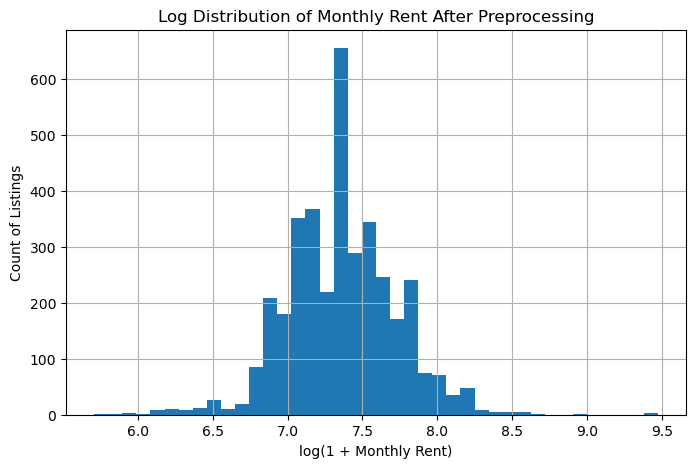

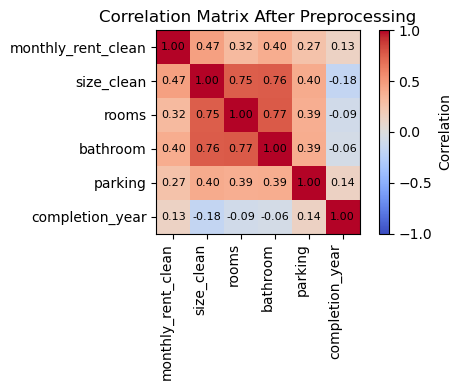


Saved: selangor_preprocessed_base.csv


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)

# Load dataset after initial basic cleaning
df = pd.read_csv("selangor_fullyfurnished_apartments_cleaned.csv")
print("Initial shape:", df.shape)

# Remove exact duplicate rows
df = df.drop_duplicates()

# Remove repeated ads_id so each listing is unique
if "ads_id" in df.columns:
    dup_ids = df["ads_id"].duplicated(keep="first").sum()
    df = df[~df["ads_id"].duplicated(keep="first")]

# Trim clear outliers for rent and size (based on earlier EDA)
df = df[
    df["monthly_rent_clean"].between(300, 20000)
    & df["size_clean"].between(150, 4000)
].copy()

# Handle remaining missing values 

# Continuous numeric: median
cont_cols = [c for c in ["completion_year"] if c in df.columns]
for c in cont_cols:
    if df[c].isna().sum() > 0:
        median_val = df[c].median()
        df.loc[:, c] = df[c].fillna(median_val)

# Discrete numeric: most frequent
disc_cols = [c for c in ["rooms", "bathroom", "parking"] if c in df.columns]
for c in disc_cols:
    if df[c].isna().sum() > 0:
        mode_val = df[c].mode()[0]
        df.loc[:, c] = df[c].fillna(mode_val)

# Drop constant columns (no information after filtering)
for c in ["region", "furnished"]:
    if c in df.columns and df[c].nunique() == 1:
        df = df.drop(columns=c)

df = df.reset_index(drop=True)
print("After preprocessing shape:", df.shape)

# Confirmation summary (post-preprocessing)

# Missing values table (should be 0 for features we use)
print("\nMissing values per column after preprocessing:")
print(df.isna().sum())

# Descriptive stats for key numeric columns
numeric_cols = [
    "monthly_rent_clean",   # target
    "completion_year",
    "rooms",
    "parking",
    "bathroom",
    "size_clean"
]
existing_numeric = [c for c in numeric_cols if c in df.columns]
print("\nDescriptive statistics (numeric columns):")
display(df[existing_numeric].describe())

# Log distribution of monthly rent (to confirm skew is reasonable)
plt.figure()
np.log1p(df["monthly_rent_clean"]).hist(bins=40)
plt.xlabel("log(1 + Monthly Rent)")
plt.ylabel("Count of Listings")
plt.title("Log Distribution of Monthly Rent After Preprocessing")
plt.show()

# Correlation matrix (numeric features after preprocessing)
corr_cols = [c for c in ["monthly_rent_clean", "size_clean", "rooms", "bathroom", "parking", "completion_year"] if c in df.columns]
corr_df = df[corr_cols]

corr = corr_df.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(corr.shape[1]), corr.columns, rotation=90, ha="right")
plt.yticks(range(corr.shape[0]), corr.index)
plt.title("Correlation Matrix After Preprocessing")

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=8)

plt.colorbar(im, fraction=0.046, pad=0.04, label="Correlation")
plt.tight_layout()
plt.show()

# Save final preprocessed base for feature engineering
df.to_csv("selangor_preprocessed_base.csv", index=False)
print("\nSaved: selangor_preprocessed_base.csv")


In [25]:
import pandas as pd
import re
from collections import Counter

# Load preprocessed base (after duplicates, outliers, missing handling)
df = pd.read_csv("selangor_preprocessed_base.csv")
print("Loaded for feature engineering:", df.shape)

# Combine facilities text columns into a single string
def combine_facilities(row):
    f1 = "" if pd.isna(row.get("facilities")) else str(row.get("facilities"))
    f2 = "" if pd.isna(row.get("additional_facilities")) else str(row.get("additional_facilities"))
    return f1 + "," + f2

df["all_facilities_raw"] = df.apply(combine_facilities, axis=1)

# Split and clean facilities to a list of normalised tokens
def split_and_clean_facilities(val):
    if pd.isna(val):
        return []
    parts = str(val).split(",")
    cleaned = []
    for p in parts:
        t = p.strip().lower()
        if t and t != "nan" and not t.isdigit():
            cleaned.append(t)
    return cleaned

df["facility_list"] = df["all_facilities_raw"].apply(split_and_clean_facilities)

# Inspect top facilities by frequency (for report and to justify selected indicators)
all_tokens = []
for lst in df["facility_list"]:
    all_tokens.extend(lst)

facility_counter = Counter(all_tokens)

fac_df = (
    pd.DataFrame(
        [{"facility": fac, "count": cnt} for fac, cnt in facility_counter.items()]
    )
    .sort_values(by="count", ascending=False)
    .reset_index(drop=True)
)

print("\nTop facilities by frequency:")
print(fac_df.head(30))

# Select common facilities to encode as binary indicators
selected_facilities = [
    "security",
    "parking",
    "swimming pool",
    "playground",
    "gymnasium",
    "air-cond",
    "cooking allowed",
    "washing machine",
    "lift",
    "minimart",
    "barbeque area",
    "jogging track",
    "multipurpose hall",
    "sauna",
    "near ktm/lrt",
    "squash court",
    "tennis court",
    "club house",
    "internet",
]

for fac in selected_facilities:
    safe = re.sub(r"\W+", "_", fac).lower()
    col_name = "has_" + safe
    fac_lc = fac.lower()
    df[col_name] = df["facility_list"].apply(
        lambda lst: 1 if any(fac_lc in x for x in lst) else 0
    )

# Drop raw facility text columns, keep only engineered indicators
drop_fac_cols = ["facilities", "additional_facilities", "all_facilities_raw", "facility_list"]
df = df.drop(columns=[c for c in drop_fac_cols if c in df.columns], errors="ignore")

print("\nAfter feature engineering shape:", df.shape)
print("Example indicator columns:", [c for c in df.columns if c.startswith("has_")][:10])

# 5. Save dataset ready for modelling
df.to_csv("selangor_preprocessed_features.csv", index=False)
print("\nSaved: selangor_preprocessed_features.csv")


Loaded for feature engineering: (3725, 14)

Top facilities by frequency:
             facility  count
0            security   3150
1             parking   2975
2       swimming pool   2943
3          playground   2913
4           gymnasium   2752
5            air-cond   2693
6     cooking allowed   2662
7     washing machine   2411
8                lift   2399
9            minimart   2063
10      barbeque area   1865
11      jogging track   1808
12  multipurpose hall   1797
13              sauna   1470
14       near ktm/lrt   1413
15       squash court    889
16       tennis court    811
17         club house    806
18           internet    611

After feature engineering shape: (3725, 31)
Example indicator columns: ['has_security', 'has_parking', 'has_swimming_pool', 'has_playground', 'has_gymnasium', 'has_air_cond', 'has_cooking_allowed', 'has_washing_machine', 'has_lift', 'has_minimart']

Saved: selangor_preprocessed_features.csv


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Load data after preprocessing + feature engineering
df = pd.read_csv("selangor_preprocessed_features.csv")
print("Loaded for modelling:", df.shape)

target_col = "monthly_rent_clean"

# Drop identifiers and non-predictive raw text
cols_to_drop = ["ads_id", "prop_name", "monthly_rent", "size", "rent_band"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors="ignore")

# Define X and y
y = df[target_col].copy()
X = df.drop(columns=[target_col])

print("\nFinal feature columns:", X.columns.tolist())

# Identify columns by type
facility_flag_cols = [c for c in X.columns if c.startswith("has_")]

numeric_cols = [
    c for c in ["completion_year", "size_clean", "rooms", "bathroom", "parking"]
    if c in X.columns
] + facility_flag_cols

categorical_cols = [
    c for c in ["property_type", "location"]
    if c in X.columns
]

print("\nNumeric cols:", numeric_cols)
print("\nCategorical cols:", categorical_cols)

# Train–test split (this is the split we keep)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("\nShapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

# Pipelines
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numeric_cols),
        ("cat", cat_pipeline, categorical_cols)
    ],
    remainder="drop"
)

# Fit on training data only
preprocessor.fit(X_train)

# Transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nX_train_processed:", X_train_processed.shape)
print("X_test_processed :", X_test_processed.shape)

# Build readable feature names
# numeric part: same order as numeric_cols
num_feature_names = [f"{c}_scaled" for c in numeric_cols]

# categorical part: from fitted OneHotEncoder
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()

feature_names = num_feature_names + cat_feature_names

# If sparse, convert to dense for CSV
if hasattr(X_train_processed, "toarray"):
    X_train_arr = X_train_processed.toarray()
    X_test_arr = X_test_processed.toarray()
else:
    X_train_arr = X_train_processed
    X_test_arr = X_test_processed

# Save with proper column names
X_train_df = pd.DataFrame(X_train_arr, columns=feature_names)
X_test_df  = pd.DataFrame(X_test_arr,  columns=feature_names)

X_train_df.to_csv("X_train_processed.csv", index=False)
X_test_df.to_csv("X_test_processed.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("\nSaved with feature names:")
print("- X_train_processed.csv")
print("- X_test_processed.csv")
print("- y_train.csv")
print("- y_test.csv")


Loaded for modelling: (3725, 31)

Final feature columns: ['completion_year', 'location', 'property_type', 'rooms', 'parking', 'bathroom', 'size_clean', 'has_security', 'has_parking', 'has_swimming_pool', 'has_playground', 'has_gymnasium', 'has_air_cond', 'has_cooking_allowed', 'has_washing_machine', 'has_lift', 'has_minimart', 'has_barbeque_area', 'has_jogging_track', 'has_multipurpose_hall', 'has_sauna', 'has_near_ktm_lrt', 'has_squash_court', 'has_tennis_court', 'has_club_house', 'has_internet']

Numeric cols: ['completion_year', 'size_clean', 'rooms', 'bathroom', 'parking', 'has_security', 'has_parking', 'has_swimming_pool', 'has_playground', 'has_gymnasium', 'has_air_cond', 'has_cooking_allowed', 'has_washing_machine', 'has_lift', 'has_minimart', 'has_barbeque_area', 'has_jogging_track', 'has_multipurpose_hall', 'has_sauna', 'has_near_ktm_lrt', 'has_squash_court', 'has_tennis_court', 'has_club_house', 'has_internet']

Categorical cols: ['property_type', 'location']

Shapes:
X_train

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Load processed data
X_train = pd.read_csv("X_train_processed.csv")
X_test  = pd.read_csv("X_test_processed.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test  = pd.read_csv("y_test.csv").values.ravel()

print("Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# Helper to print metrics
def print_regression_metrics(name, y_train, y_train_pred, y_test, y_test_pred):
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\n=== {name} - Baseline Performance ===")
    print(f"TRAIN: MAE = {mae_train:.2f}, RMSE = {rmse_train:.2f}, R² = {r2_train:.3f}")
    print(f"TEST : MAE = {mae_test:.2f}, RMSE = {rmse_test:.2f}, R² = {r2_test:.3f}")

    return {
        "mae_train": mae_train, "rmse_train": rmse_train, "r2_train": r2_train,
        "mae_test": mae_test, "rmse_test": rmse_test, "r2_test": r2_test
    }

# Baseline Random Forest
rf_baseline = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_baseline.fit(X_train, y_train)

y_train_pred_rf = rf_baseline.predict(X_train)
y_test_pred_rf = rf_baseline.predict(X_test)

rf_results = print_regression_metrics(
    "Random Forest Regressor (Baseline)",
    y_train, y_train_pred_rf,
    y_test, y_test_pred_rf
)

# Baseline MLP Regressor
mlp_baseline = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    max_iter=300,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20
)
mlp_baseline.fit(X_train, y_train)

y_train_pred_mlp = mlp_baseline.predict(X_train)
y_test_pred_mlp = mlp_baseline.predict(X_test)

mlp_results = print_regression_metrics(
    "MLP Regressor (Baseline)",
    y_train, y_train_pred_mlp,
    y_test, y_test_pred_mlp
)


Shapes:
X_train: (2980, 92) X_test: (745, 92)
y_train: (2980,) y_test: (745,)

=== Random Forest Regressor (Baseline) - Baseline Performance ===
TRAIN: MAE = 86.61, RMSE = 251.54, R² = 0.875
TEST : MAE = 197.40, RMSE = 333.46, R² = 0.740

=== MLP Regressor (Baseline) - Baseline Performance ===
TRAIN: MAE = 241.93, RMSE = 465.88, R² = 0.570
TEST : MAE = 266.14, RMSE = 388.73, R² = 0.647


C:\Users\xueer\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Load processed data
X_train = pd.read_csv("X_train_processed.csv")
X_test  = pd.read_csv("X_test_processed.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test  = pd.read_csv("y_test.csv").values.ravel()

print("Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# Base estimator (single-threaded to reduce memory pressure)
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=1
)

# Compact search space (focused around sensible values)
param_dist = {
    "n_estimators":      [100, 200, 300],
    "max_depth":         [12, 15, 18, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":  [1, 2, 4],
    "max_features":      [0.4, 0.6, "sqrt"],
    "bootstrap":         [True]
}

# Randomized search (much lighter than full grid)
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                          # 20 candidate settings only
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=1,                           # avoid BrokenProcessPool / MemoryError
    verbose=2,
    random_state=42
)

rf_search.fit(X_train, y_train)

print("\nBest parameters from RandomizedSearchCV:")
print(rf_search.best_params_)

best_rf = rf_search.best_estimator_

# Evaluate tuned model
y_train_pred = best_rf.predict(X_train)
y_test_pred  = best_rf.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train   = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test   = r2_score(y_test, y_test_pred)

print("\n=== Tuned Random Forest Performance (RandomizedSearchCV) ===")
print(f"TRAIN: MAE = {mae_train:.2f}, RMSE = {rmse_train:.2f}, R² = {r2_train:.3f}")
print(f"TEST : MAE = {mae_test:.2f}, RMSE = {rmse_test:.2f}, R² = {r2_test:.3f}")


Shapes:
X_train: (2980, 92) X_test: (745, 92)
y_train: (2980,) y_test: (745,)
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, m

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

param_grid = {
    "n_estimators":      [180, 200, 220],
    "max_features":      [0.5, 0.6, 0.7],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf":  [1, 2],
    "max_depth":         [None, 18, 20],
}

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=1,
    bootstrap=True
)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   2.6s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   3.2s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   1.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   3.2s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_esti

In [10]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Show best parameters
print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)

# Get best model from grid search
best_rf = grid_search.best_estimator_

# Evaluate on train and test sets
y_train_pred = best_rf.predict(X_train)
y_test_pred  = best_rf.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train   = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test   = r2_score(y_test, y_test_pred)

print("\n=== Tuned Random Forest Performance (GridSearchCV) ===")
print(f"TRAIN: MAE = {mae_train:.2f}, RMSE = {rmse_train:.2f}, R² = {r2_train:.3f}")
print(f"TEST : MAE = {mae_test:.2f}, RMSE = {rmse_test:.2f}, R² = {r2_test:.3f}")



Best parameters from GridSearchCV:
{'max_depth': None, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 180}

=== Tuned Random Forest Performance (GridSearchCV) ===
TRAIN: MAE = 94.98, RMSE = 265.83, R² = 0.860
TEST : MAE = 200.98, RMSE = 329.72, R² = 0.746


In [27]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Load data
X_train = pd.read_csv("X_train_processed.csv")
X_test  = pd.read_csv("X_test_processed.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test  = pd.read_csv("y_test.csv").values.ravel()

print("Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# Pipeline: StandardScaler -> MLP
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        activation="relu",
        solver="adam",
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=20,
        max_iter=800,
        random_state=42
    ))
])

# Hyperparameter grid (note the mlp__ prefix)
param_grid = {
    "mlp__hidden_layer_sizes": [
        (64, 32),
        (128, 64),
        (128, 64, 32)
    ],
    "mlp__learning_rate_init": [0.001, 0.0005],
    "mlp__alpha": [0.0001, 0.001, 0.01],
    "mlp__batch_size": [32, 64],
}

mlp_grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=1,
    verbose=2
)

mlp_grid.fit(X_train, y_train)

print("\nBest parameters from GridSearchCV (MLP):")
print(mlp_grid.best_params_)

best_mlp = mlp_grid.best_estimator_

# Evaluate tuned MLP
y_train_pred = best_mlp.predict(X_train)
y_test_pred  = best_mlp.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train   = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test   = r2_score(y_test, y_test_pred)

print("\n=== Tuned MLP Regressor Performance (with Scaling) ===")
print(f"TRAIN: MAE = {mae_train:.2f}, RMSE = {rmse_train:.2f}, R² = {r2_train:.3f}")
print(f"TEST : MAE = {mae_test:.2f}, RMSE = {rmse_test:.2f}, R² = {r2_test:.3f}")


Shapes:
X_train: (2980, 92) X_test: (745, 92)
y_train: (2980,) y_test: (745,)
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(64, 32), mlp__learning_rate_init=0.001; total time=  13.4s
[CV] END mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(64, 32), mlp__learning_rate_init=0.001; total time=  14.2s
[CV] END mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(64, 32), mlp__learning_rate_init=0.001; total time=  10.8s
[CV] END mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(64, 32), mlp__learning_rate_init=0.0005; total time=  20.4s
[CV] END mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(64, 32), mlp__learning_rate_init=0.0005; total time=  20.4s
[CV] END mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(64, 32), mlp__learning_rate_init=0.0005; total time=  23.4s
[CV] END mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Load data
X_train = pd.read_csv("X_train_processed.csv")
X_test  = pd.read_csv("X_test_processed.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test  = pd.read_csv("y_test.csv").values.ravel()

print("Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# Helper
def eval_model(name, model, Xtr, Ytr, Xte, Yte):
    ytr_pred = model.predict(Xtr)
    yte_pred = model.predict(Xte)

    mae_tr = mean_absolute_error(Ytr, ytr_pred)
    rmse_tr = root_mean_squared_error(Ytr, ytr_pred)
    r2_tr = r2_score(Ytr, ytr_pred)

    mae_te = mean_absolute_error(Yte, yte_pred)
    rmse_te = root_mean_squared_error(Yte, yte_pred)
    r2_te = r2_score(Yte, yte_pred)

    print(f"\n=== {name} ===")
    print(f"TRAIN: MAE = {mae_tr:.2f}, RMSE = {rmse_tr:.2f}, R² = {r2_tr:.3f}")
    print(f"TEST : MAE = {mae_te:.2f}, RMSE = {rmse_te:.2f}, R² = {r2_te:.3f}")

# Baseline Random Forest
rf_baseline = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_baseline.fit(X_train, y_train)
eval_model("Random Forest (Baseline)", rf_baseline, X_train, y_train, X_test, y_test)

# Baseline MLP (NO scaler, original config)
mlp_baseline = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    max_iter=300,              # original baseline budget
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20
)
mlp_baseline.fit(X_train, y_train)
eval_model("MLP (Baseline, Unscaled)", mlp_baseline, X_train, y_train, X_test, y_test)

# Tuned Random Forest (RandomizedSearchCV best params)
rf_tuned = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    max_features=0.6,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf_tuned.fit(X_train, y_train)
eval_model("Random Forest (Tuned Final)", rf_tuned, X_train, y_train, X_test, y_test)

# Tuned MLP (with scaler, GridSearchCV best params)
mlp_tuned = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        learning_rate_init=0.001,
        alpha=0.001,
        batch_size=32,
        max_iter=800,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=20
    ))
])
mlp_tuned.fit(X_train, y_train)
eval_model("MLP (Tuned Final, Scaled)", mlp_tuned, X_train, y_train, X_test, y_test)


Shapes:
X_train: (2980, 92) X_test: (745, 92)
y_train: (2980,) y_test: (745,)

=== Random Forest (Baseline) ===
TRAIN: MAE = 86.61, RMSE = 251.54, R² = 0.875
TEST : MAE = 197.40, RMSE = 333.46, R² = 0.740


C:\Users\xueer\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== MLP (Baseline, Unscaled) ===
TRAIN: MAE = 241.93, RMSE = 465.88, R² = 0.570
TEST : MAE = 266.14, RMSE = 388.73, R² = 0.647

=== Random Forest (Tuned Final) ===
TRAIN: MAE = 86.54, RMSE = 249.68, R² = 0.876
TEST : MAE = 197.84, RMSE = 325.06, R² = 0.753

=== MLP (Tuned Final, Scaled) ===
TRAIN: MAE = 204.26, RMSE = 431.59, R² = 0.631
TEST : MAE = 257.63, RMSE = 381.12, R² = 0.660


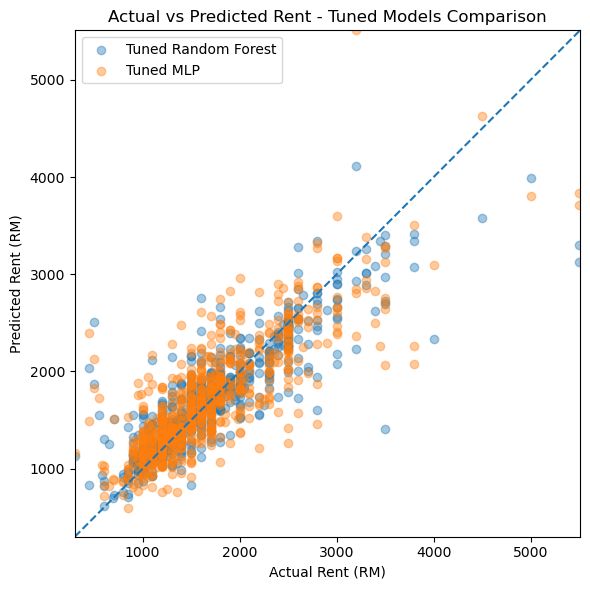

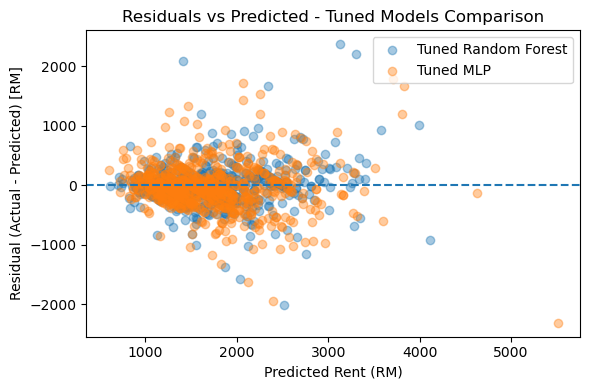

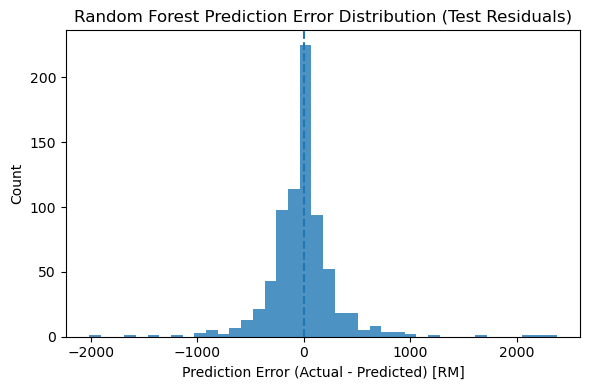

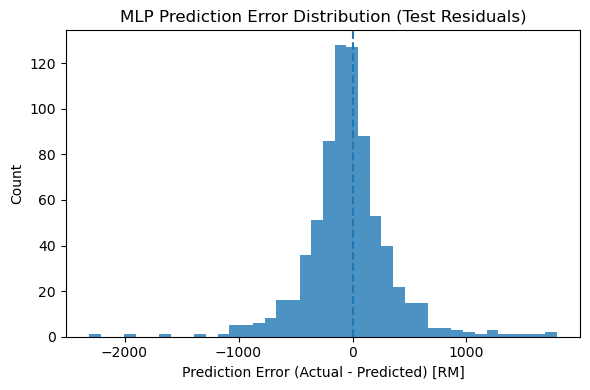

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions for tuned models
y_test_pred_rf = rf_tuned.predict(X_test)
y_test_pred_mlp = mlp_tuned.predict(X_test)

# Residuals
res_rf = y_test - y_test_pred_rf
res_mlp = y_test - y_test_pred_mlp

# Actual vs Predicted (Tuned RF vs Tuned MLP)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.4, label="Tuned Random Forest")
plt.scatter(y_test, y_test_pred_mlp, alpha=0.4, label="Tuned MLP")
lims = [
    min(y_test.min(), y_test_pred_rf.min(), y_test_pred_mlp.min()),
    max(y_test.max(), y_test_pred_rf.max(), y_test_pred_mlp.max())
]
plt.plot(lims, lims, linestyle="--")
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel("Actual Rent (RM)")
plt.ylabel("Predicted Rent (RM)")
plt.title("Actual vs Predicted Rent - Tuned Models Comparison")
plt.legend()
plt.tight_layout()
plt.show()

# Residuals vs Predicted (Tuned RF vs Tuned MLP)
plt.figure(figsize=(6,4))
plt.scatter(y_test_pred_rf, res_rf, alpha=0.4, label="Tuned Random Forest")
plt.scatter(y_test_pred_mlp, res_mlp, alpha=0.4, label="Tuned MLP")
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Rent (RM)")
plt.ylabel("Residual (Actual - Predicted) [RM]")
plt.title("Residuals vs Predicted - Tuned Models Comparison")
plt.legend()
plt.tight_layout()
plt.show()

# Residual Histogram - Tuned Random Forest
plt.figure(figsize=(6,4))
plt.hist(res_rf, bins=40, alpha=0.8)
plt.axvline(0, linestyle="--")
plt.xlabel("Prediction Error (Actual - Predicted) [RM]")
plt.ylabel("Count")
plt.title("Random Forest Prediction Error Distribution (Test Residuals)")
plt.tight_layout()
plt.show()

# Residual Histogram - Tuned MLP
plt.figure(figsize=(6,4))
plt.hist(res_mlp, bins=40, alpha=0.8)
plt.axvline(0, linestyle="--")
plt.xlabel("Prediction Error (Actual - Predicted) [RM]")
plt.ylabel("Count")
plt.title("MLP Prediction Error Distribution (Test Residuals)")
plt.tight_layout()
plt.show()


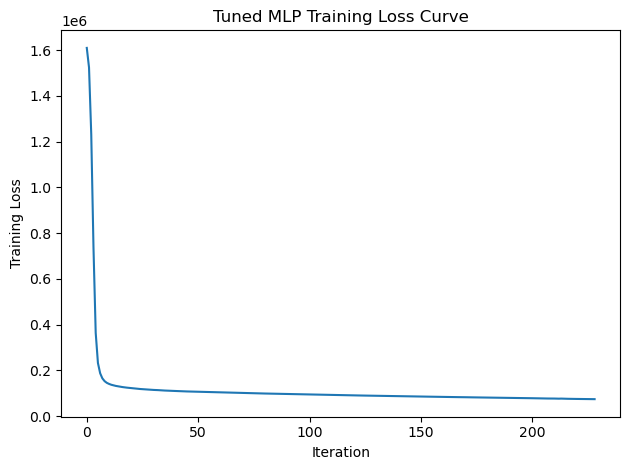

In [9]:
mlp = mlp_tuned.named_steps["mlp"]
plt.plot(mlp.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("Tuned MLP Training Loss Curve")
plt.tight_layout()
plt.show()


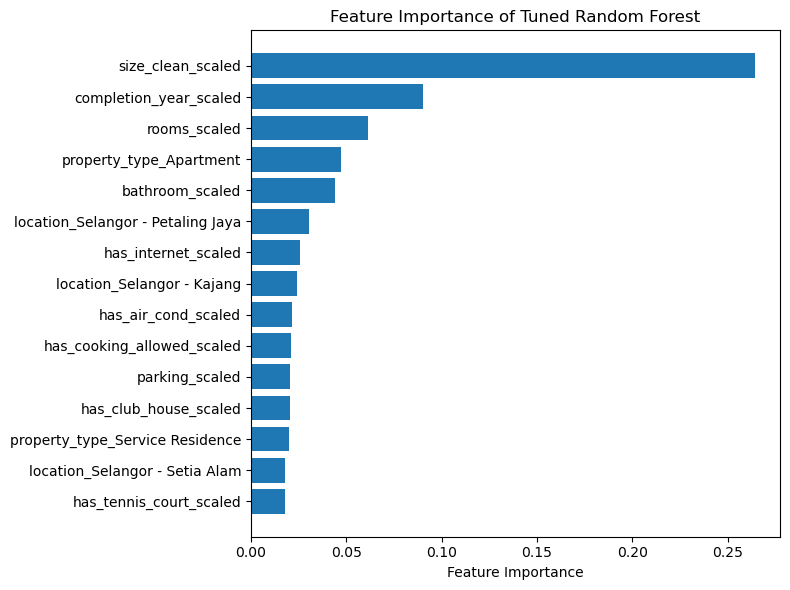

In [11]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = X_train.columns

importances = rf_tuned.feature_importances_
indices = np.argsort(importances)[::-1]

top_k = 15  
top_idx = indices[:top_k]

plt.figure(figsize=(8, 6))
plt.barh(range(len(top_idx)), importances[top_idx][::-1])
plt.yticks(range(len(top_idx)), feature_names[top_idx][::-1])
plt.xlabel("Feature Importance")
plt.title("Feature Importance of Tuned Random Forest")
plt.tight_layout()
plt.show()


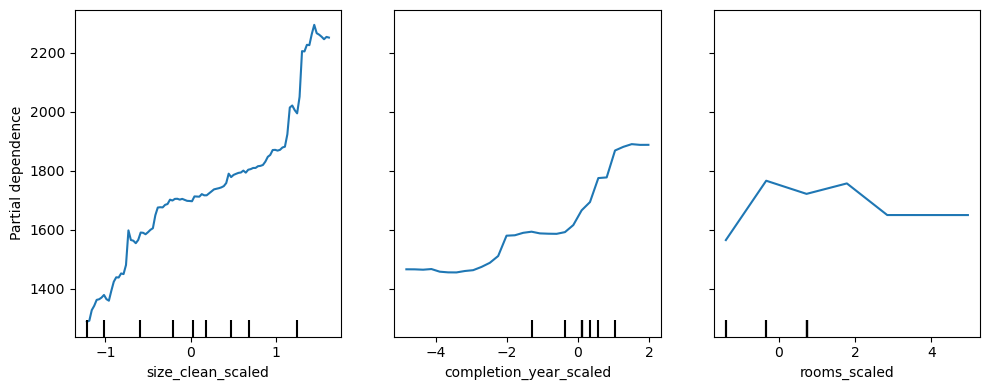

In [15]:
from sklearn.inspection import PartialDependenceDisplay

key_features = ["size_clean_scaled", "completion_year_scaled", "rooms_scaled"]  # top features

fig, ax = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(
    rf_tuned,
    X_train,
    features=key_features,
    ax=ax
)
plt.tight_layout()
plt.show()


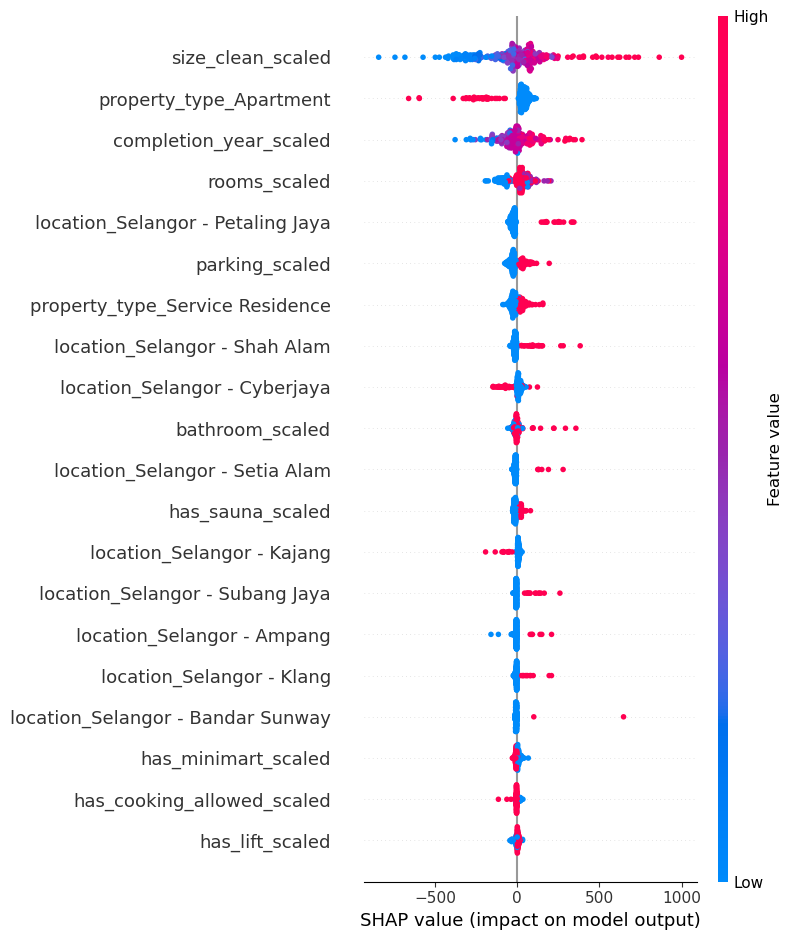

In [22]:
import shap

X_sample = X_train.sample(n=300, random_state=42)

explainer = shap.TreeExplainer(rf_tuned)
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns)
